In [1]:
import pandas as pd
from utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier


In [2]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [3]:
X_train = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [4]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [5]:
model = lr = LogisticRegression(C=1/1000, solver='liblinear', max_iter=500,
                                class_weight=calculate_class_weights(y_train, "Depression"))
model.fit(X_train_scaled,y_train["Depression"])
predicted = model.predict(X_test_scaled)
y_test["Depression_predicted"] = predicted

/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_16918/1319725724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Depression_predicted"] = predicted


Accuracy: 0.6
Balanced Accuracy: 0.5714285714285714
Equality of Opportunity: 0.4


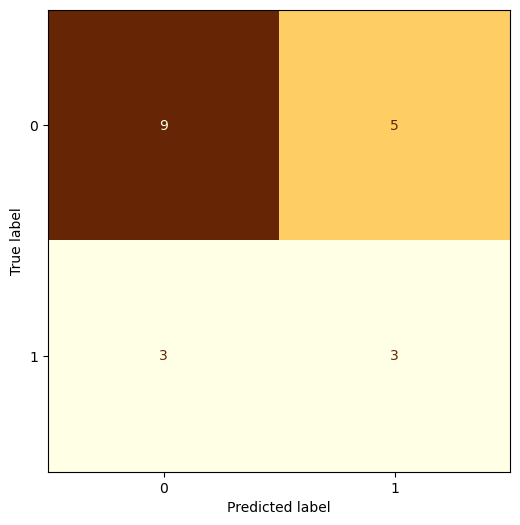

In [6]:
acc, bal_acc, eo_score = compute_metrics(y_test, eo=True)

print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
print(f"Equality of Opportunity: {eo_score}")

show_conf_matrix(y_test)

/Users/vikram/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 0.3
Balanced Accuracy: 0.35714285714285715
Equality of Opportunity: 0.4


/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_16918/2121493702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Depression_predicted"] = predicted


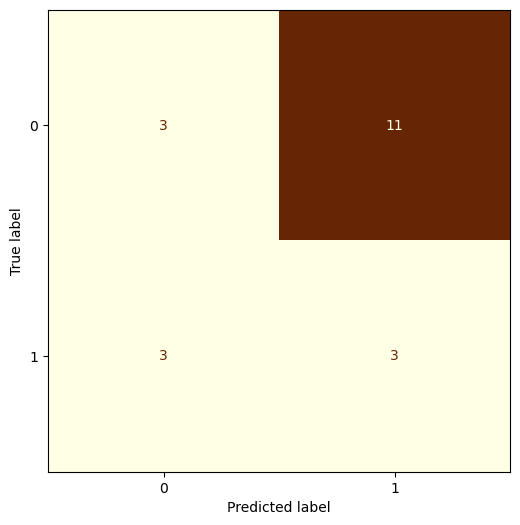

In [7]:
model = lr = SGDClassifier(loss='log', max_iter=500, 
                           class_weight={0:1, 1:4})
model.fit(X_train_scaled,y_train["Depression"])
predicted = model.predict(X_test_scaled)
y_test["Depression_predicted"] = predicted
acc, bal_acc, eo_score = compute_metrics(y_test, eo=True)

print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
print(f"Equality of Opportunity: {eo_score}")

show_conf_matrix(y_test)